# Make Potential Publication Plots for WDS-Gaia Paper

In [163]:
from astropy.table import Table, vstack
from astropy.coordinates import SkyCoord, Angle, Distance
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np
from numpy import mean, median, std, log, exp
%matplotlib inline
plt.style.use('seaborn-deep')

In [130]:
# Access the default color cycle from the style sheet
default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
wds_color = default_colors[0] 
all_color = default_colors[5]
as_color = default_colors[2]
non_color = default_colors[1]

#### Read in the wds table, query results table and the sorted results (so we can look at all the objects together as well as the sorted systems)

In [82]:
directory = '/home/sc36/dzakarian_wsl/wds_gaia_project/WDS_Gaia/'
wds_tab = Table.read(f'{directory}wdstab6-27.ecsv', header_start=0, data_start=1) 

query_results_tab = Table.read(f'{directory}/stack_query_results_table_fixed4-20.ecsv', header_start=0, data_start=1) 
index_error_queries = Table.read(f'{directory}/stack_index_error_queries_fixed4-20.ecsv', header_start=0, data_start=1) 

associated_systems_tab = Table.read(f'{directory}/associated_systems_table_fixed4-20.ecsv', header_start=0, data_start=1) 
non_associated_systems_tab = Table.read(f'{directory}/non_associated_systems_table_fixed4-20.ecsv', header_start=0, data_start=1) 


In [62]:
wds_tab.info

<Table length=154513>
     name       dtype    unit      class     n_bad
-------------- ------- -------- ------------ -----
WDS Identifier   str13                Column     0
       Epoch-1   int64       yr       Column     0
       Epoch-2   int64       yr       Column     0
       Theta-1   int64      deg       Column     0
       Theta-2   int64      deg       Column     0
         Rho-1 float64   arcsec       Column     0
         Rho-2 float64   arcsec       Column     0
       Mag-pri    str5      mag       Column     0
       Mag-sec    str4      mag       Column     0
      PMpri-RA float64 mas / yr MaskedColumn  1959
     PMpri-DEC float64 mas / yr MaskedColumn  1958
      PMsec-RA float64 mas / yr MaskedColumn 47601
     PMsec-DEC float64 mas / yr MaskedColumn 47600
       WDS_RA"    str9                Column     0
      WDS_DEC"    str9                Column     0
      RAprideg float64      deg       Column     0
     DECprideg float64      deg       Column     0
         

In [63]:
query_results_tab.info

<Table length=93402>
             name               dtype    unit      class     n_bad
------------------------------ ------- -------- ------------ -----
                wds_identifier   str13          MaskedColumn    12
                    wds_rownum   int64                Column     0
                   source_id_a   str19          MaskedColumn    12
                   source_id_b   str19          MaskedColumn    12
                   ref_epoch_a float64                Column     0
                   ref_epoch_b float64                Column     0
                          ra_a float64      deg       Column     0
                          ra_b float64      deg       Column     0
                    ra_error_a float64      mas       Column     0
                    ra_error_b float64      mas       Column     0
                         dec_a float64      deg       Column     0
                         dec_b float64      deg       Column     0
                   dec_error_a float64   

In [64]:
associated_systems_tab.info

<Table length=31419>
             name               dtype     unit       class     n_bad
------------------------------ ------- ---------- ------------ -----
                wds_identifier   str13            MaskedColumn    12
                    wds_rownum   int64                  Column     0
                   source_id_a   str19            MaskedColumn    12
                   source_id_b   str19            MaskedColumn    12
                   ref_epoch_a float64                  Column     0
                   ref_epoch_b float64                  Column     0
                          ra_a float64        deg       Column     0
                          ra_b float64        deg       Column     0
                    ra_error_a float64        mas       Column     0
                    ra_error_b float64        mas       Column     0
                         dec_a float64        deg       Column     0
                         dec_b float64        deg       Column     0
             

## Plot 1) Projection of the WDS Sources on the Sky 

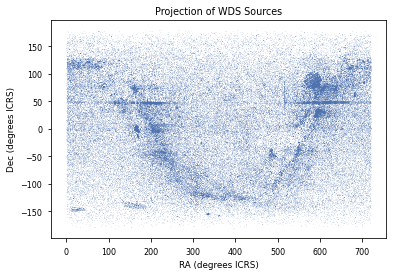

In [172]:
# plt.style.use('seaborn-paper')

# plt.hist(seps, bins=25, range=(0, 100), color=wds_color, log=True)
# plt.title('Angular Separation of WDS Entries')
# plt.xlabel('Angular Separation (arcsec)')
# plt.ylabel('Frequency (log scale)')
# plt.xlim(0, 100)
# # plt.grid(True, linestyle='--', alpha=0.5)

title='Projection of WDS Sources'
save_title=title.replace(' ', '_')
ras = wds_tab['RApri-prepped'] + wds_tab['RAsec-prepped']
decs = wds_tab['DECpri-prepped'] + wds_tab['DECsec-prepped']
plt.figure(figsize=(6, 4))
plt.scatter(ras, decs, color= wds_color, marker='o', alpha=0.2, s=.3)
plt.xlabel("RA (degrees ICRS)")
plt.ylabel("Dec (degrees ICRS)")
plt.title(title)
plt.savefig(f'{save_title}.png', dpi=300, bbox_inches='tight')

### Plot 2) Projection of the WDS-Gaia Sources on the Sky

a] Both together (distinguished by color)

b] Just the physical pairs

c] Just the non-physical pairs

#### A) all query results

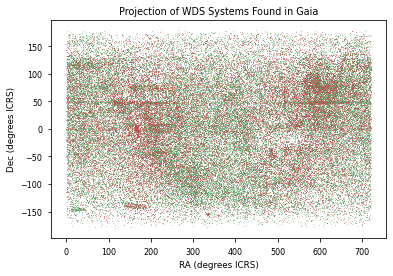

In [174]:
as_ras = associated_systems_tab['ra_a'] + associated_systems_tab['ra_b']
as_decs = associated_systems_tab['dec_a'] + associated_systems_tab['dec_b']
non_ras = non_associated_systems_tab['ra_a'] + non_associated_systems_tab['ra_b']
non_decs = non_associated_systems_tab['dec_a'] + non_associated_systems_tab['dec_b']

title = 'Projection of WDS Systems Found in Gaia'
save_title=title.replace(' ', '_')

plt.figure(figsize=(6, 4))
plt.scatter(non_ras, non_decs, color=non_color, marker='o', alpha=0.8, s=.3)
plt.scatter(as_ras, as_decs, color = as_color, marker='o', alpha=0.8, s=.3) 

plt.xlabel("RA (degrees ICRS)")
plt.ylabel("Dec (degrees ICRS)")
plt.title(title)
plt.savefig(f'{save_title}.png', dpi=300, bbox_inches='tight')



#### B) Associated Pairs

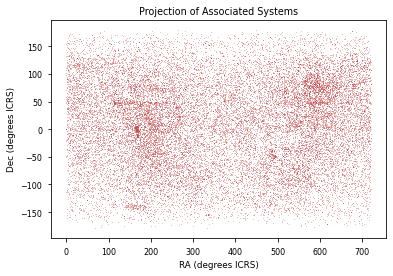

In [175]:
as_ras = associated_systems_tab['ra_a'] + associated_systems_tab['ra_b']
as_decs = associated_systems_tab['dec_a'] + associated_systems_tab['dec_b']

title = 'Projection of Associated Systems'
save_title=title.replace(' ', '_')

plt.figure(figsize=(6, 4))
plt.scatter(as_ras, as_decs, color=as_color, marker='o', alpha=0.6, s=.3) 

plt.xlabel("RA (degrees ICRS)")
plt.ylabel("Dec (degrees ICRS)")
plt.title(title)
plt.savefig(f'{save_title}.png', dpi=300, bbox_inches='tight')

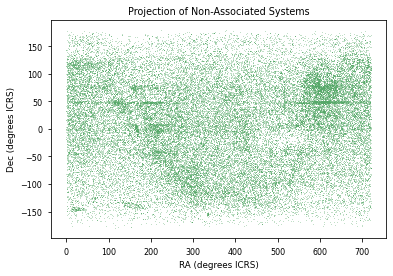

In [177]:
non_ras = non_associated_systems_tab['ra_a'] + non_associated_systems_tab['ra_b']
non_decs = non_associated_systems_tab['dec_a'] + non_associated_systems_tab['dec_b']

title = 'Projection of Non-Associated Systems'
save_title=title.replace(' ', '_')

plt.figure(figsize=(6, 4))
plt.scatter(non_ras, non_decs, color=non_color, marker='o', alpha=0.6, s=.3)

plt.xlabel("RA (degrees ICRS)")
plt.ylabel("Dec (degrees ICRS)")
plt.title(title)
plt.savefig(f'{save_title}.png', dpi=300, bbox_inches='tight')


### Plot 3) Angular Separation Histogram
a] Both together (distinguished by color)

b] Just the physical pairs

c] Just the non-physical pairs

#### A) WDS 

In [135]:
ra_as = wds_tab['RApri-prepped'] 
ra_bs = wds_tab['RAsec-prepped']
dec_as = wds_tab['DECpri-prepped'] 
dec_bs = wds_tab['DECsec-prepped']

acoords = SkyCoord(ra_as, dec_as, frame='icrs')
bcoords = SkyCoord(ra_bs, dec_bs, frame='icrs')


# calcualte the separation between the two objects
wds_seps = acoords.separation(bcoords).to(u.arcsec).value


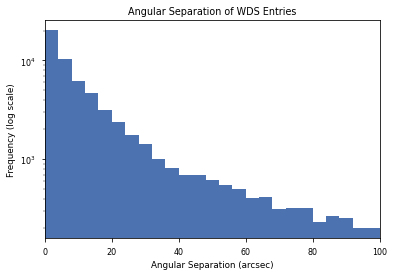

In [178]:
title = 'Angular Separation of WDS Entries'
save_title = title.replace(' ', '_')

plt.style.use('seaborn-paper')
plt.figure(figsize=(6, 4))
plt.hist(wds_seps, bins=25, range=(0, 100), color=wds_color, log=True)
plt.title(title)
plt.xlabel('Angular Separation (arcsec)')
plt.ylabel('Frequency (log scale)')
plt.xlim(0, 100)
# plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig(f'{save_title}.png', dpi=300, bbox_inches='tight')

#### B) All Query Results

In [144]:
all_seps = np.concatenate((associated_systems_tab['separation'], non_associated_systems_tab['separation']))

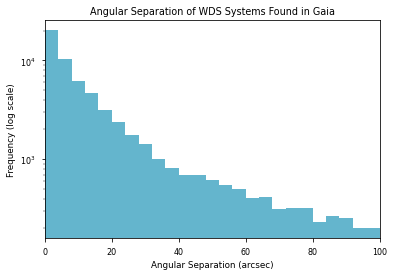

In [179]:
title = 'Angular Separation of WDS Systems Found in Gaia'
save_title = title.replace(' ', '_')

plt.style.use('seaborn-paper')
plt.figure(figsize=(6, 4))
plt.hist(all_seps, bins=25, range=(0, 100), color=all_color, log=True)
plt.title(title)
plt.xlabel('Angular Separation (arcsec)')
plt.ylabel('Frequency (log scale)')
plt.xlim(0, 100)
# plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig(f'{save_title}.png', dpi=300, bbox_inches='tight')

#### C) Associated Systems

In [153]:
as_seps = associated_systems_tab['separation']

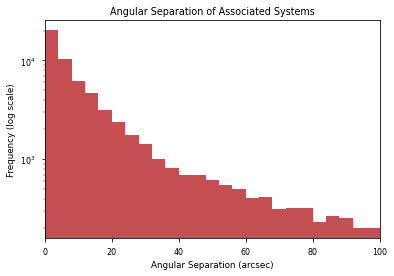

In [182]:
title = 'Angular Separation of Associated Systems'
save_title = title.replace(' ', '_')

plt.style.use('seaborn-paper')
plt.figure(figsize=(6, 4))
plt.hist(as_seps, bins=25, range=(0, 100), color=as_color, log=True)
plt.title(title)
plt.xlabel('Angular Separation (arcsec)')
plt.ylabel('Frequency (log scale)')
plt.xlim(0, 100)
# plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig(f'{save_title}.png', dpi=300, bbox_inches='tight')

#### D) Non-Associated Systems

In [161]:
non_seps = non_associated_systems_tab['separation']

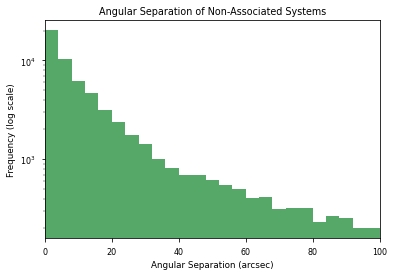

In [183]:
title = 'Angular Separation of Non-Associated Systems'
save_title = title.replace(' ', '_')

plt.style.use('seaborn-paper')
plt.figure(figsize=(6, 4))
plt.hist(non_seps, bins=25, range=(0, 100), color=non_color, log=True)
plt.title(title)
plt.xlabel('Angular Separation (arcsec)')
plt.ylabel('Frequency (log scale)')
plt.xlim(0, 100)
# plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig(f'{save_title}.png', dpi=300, bbox_inches='tight')

### Plot 4) Physical Separation Histogram

a] Both together (distinguished by color)

b] Just the physical pairs

c] Just the non-physical pairs

In [185]:
as_seps = associated_systems_tab['separation']
non_seps = non_associated_systems_tab['separation']

# pi stands for parallax
as_pis = associated_systems_tab['parallax_a', 'parallax_b']
non_pis = non_associated_systems_tab['parallax_a', 'parallax_b']


### Plot 5) Delta-Mag Histogram

a] Both together (distinguished by color)

b] Just the physical pairs

c] Just the non-physical pairs

### Plot 6) Mag vs Mag plot

a] Both together (distinguished by color)

b] Just the physical pairs

c] Just the non-physical pairs

### Plot 7) Color Magnitude Diagram

a] Both together (distinguished by color)

b] Just the physical pairs

c] Just the non-physical pairs